In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import math

rng = np.random.default_rng(seed=53)


In [2]:
n_wires=6
dev = qml.device('default.qubit', wires=n_wires)
filename='t1.npy'
sample_x = np.linspace(0.1, 0.9, 10, endpoint=True)

In [3]:
def plot_u():
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_y = np.sin(sample_x)

    plt.plot(sample_x, sample_y, 'bo-')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Plot of sin(x)')
    # plt.grid(True)
    plt.show()

In [4]:
def phi(x, j):  # Chebyshev
    return 2 * j * np.arccos(x)

def dphi1(x):
    return -1 / np.sqrt(1 - x ** 2)

def dphi2(x):
    return -x / ((1 - x ** 2) ** (3 / 2))

In [5]:
@qml.qnode(dev)
def u_x(x,parameters):
    # feature map
    for j in range(n_wires):
        qml.RY(phi=phi(x,j+1),wires=j)
    # ansatz
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(dev.num_wires)) 
    # Cost function <Z>
    return qml.expval(qml.PauliZ(0))

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)
# w = rng.random(size=shape)
# print(qml.draw(u_x)(0.1,w))

In [6]:
def calculate_loss_boundry(parameters,err="MSE"):
    #boundry for u(x)=sin(x), u(0)=0, u(1)=0.84
    x = [0,1]
    u = [0,0.84]
    u_predict=[0,0]
    error = None
    for i in range(len(x)):
        u_predict[i]=u_x(x=x[i],parameters=parameters)

    if err=="MSE":
        #MSE
        error = np.mean((np.array(x) - np.array(u))**2)
    else:
        raise Exception('Not implemented yet')
    return error
# calculate_loss_boundry(weights)

In [7]:
def calculate_loss_interior(parameters,err="MSE"):
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_u = np.sin(sample_x)
    u_predict=[0]*len(sample_x)
    error = None
    for i in range(len(sample_x)):
        u_predict[i]=u_x(x=sample_x[i],parameters=parameters)

    if err=="MSE":
        #MSE
        error = np.mean((np.array(u_predict) - np.array(sample_u))**2)
    else:
        raise Exception('Not implemented yet')
    return error

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# calculate_loss_interior(params)

In [8]:
def loss_func(params,l_b=0.1,l_i=0.9):
    loss= l_b*calculate_loss_boundry(params)+l_i*calculate_loss_interior(params)
    return loss

In [9]:
def plot_u_predict(params):
    # sample_x = np.linspace(0, 1, 10, endpoint=True)
    sample_u = np.sin(sample_x)
    sample_u_predict = []
    for x in sample_x:
        sample_u_predict.append(u_x(x, params))  # Assuming u_x is defined elsewhere

    plt.plot(sample_x, sample_u, 'bo-', label='Actual')
    plt.plot(sample_x, sample_u_predict, 'r*-', label='Predicted')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Plot of sin(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
# plot_u_predict()

Step  0 
 params =  None  loss =  0.23693961020900953


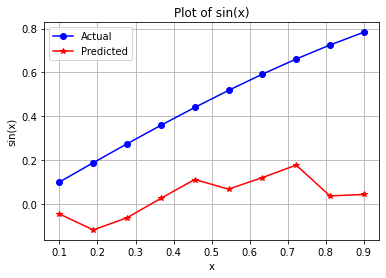

Step  10 
 params =  None  loss =  0.0763766707568723


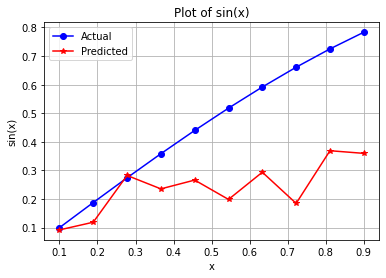

Step  20 
 params =  None  loss =  0.02773339124327901


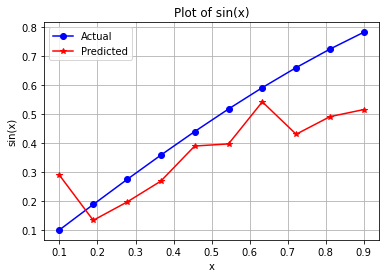

Step  30 
 params =  None  loss =  0.0032466385536108248


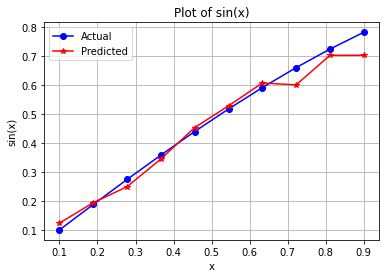

Step  40 
 params =  None  loss =  0.0020905985709569535


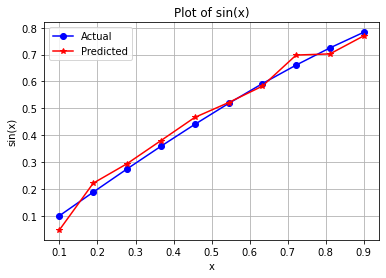

Step  50 
 params =  None  loss =  0.0014879389746362283


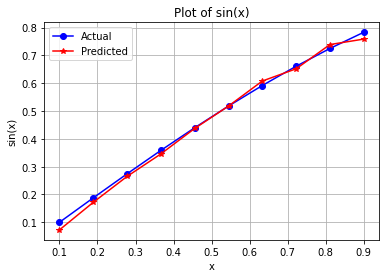

Step  60 
 params =  None  loss =  0.0014260506542896224


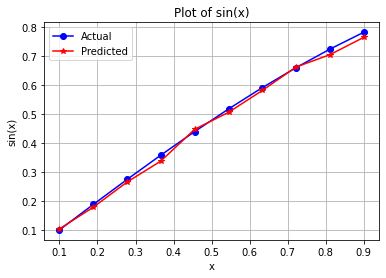

Step  70 
 params =  None  loss =  0.0013122289479060225


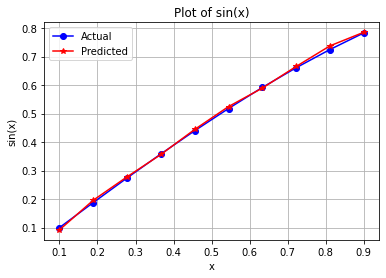

Step  80 
 params =  None  loss =  0.0012846344654364188


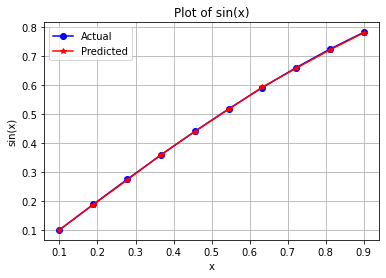

Step  90 
 params =  None  loss =  0.0012838912943236166


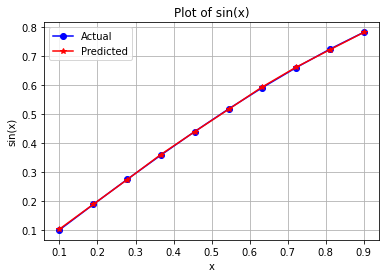

Step  100 
 params =  None  loss =  0.0012820355019003758


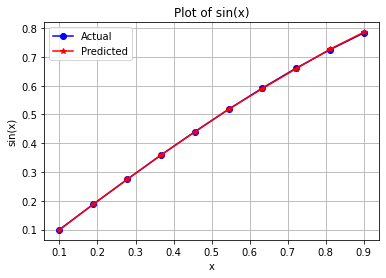

In [10]:
shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_wires)#TODO:// dynamic
params = rng.random(size=shape)
# opt = qml.GradientDescentOptimizer() #TODO:// ADAM
opt = qml.AdamOptimizer(0.05, beta1=0.9, beta2=0.999)
for i in range(110):
    params, loss = opt.step_and_cost(loss_func, params)
    if i%10==0:
        print("Step ", i, "\n params = ", None,' loss = ',loss)
        plot_u_predict(params)
        np.save(filename, params)
        

In [13]:
# print(params)
# np.save(filename, params)
loaded_params = np.load(filename)
print("Loaded parameters:", loaded_params)

Loaded parameters: [[[ 7.92584000e-01  4.96577578e-01  8.37177042e-01]
  [ 1.38276104e+00  3.17091963e-01  1.31062160e+00]
  [ 6.88898411e-01  1.58963135e+00  1.35568209e+00]
  [ 1.20298708e+00 -3.08182231e-02 -2.13950015e-01]
  [ 2.00370205e-01  1.40889514e+00  7.17912895e-01]
  [ 1.19105137e+00 -2.44736755e-01  7.34317968e-01]]

 [[ 9.90709265e-01  1.73111362e-01  9.10081104e-01]
  [ 2.42752426e-01  2.53181926e-01  8.80110991e-01]
  [ 2.78517236e-02 -1.73272272e-01  1.34624995e+00]
  [ 1.58273495e+00  2.13853515e-01  1.65867505e-01]
  [-7.87294873e-01  4.30168445e-01  8.16436361e-01]
  [ 1.10474445e+00  9.51624167e-02  3.96605144e-01]]

 [[ 6.50901271e-01  5.22517705e-01  3.57765485e-01]
  [ 6.69503303e-01  6.10103196e-01  5.11909830e-01]
  [ 9.34240159e-01  1.55753642e-01  6.27905706e-01]
  [ 9.44619540e-01  6.07381587e-04  6.43282023e-01]
  [ 7.82369448e-01  6.54766215e-01  6.07836611e-01]
  [-2.45987576e-02  3.99719470e-01  4.65603022e-01]]

 [[ 3.48967112e-01  3.45820436e-01  9.9

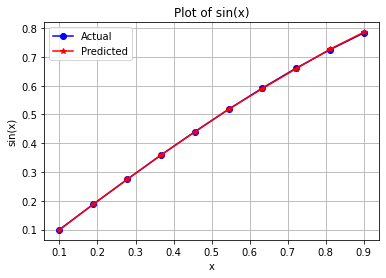

[0.1        0.18888889 0.27777778 0.36666667 0.45555556 0.54444444
 0.63333333 0.72222222 0.81111111 0.9       ]
0.28595222510483553
0.29234938953615575


In [14]:
plot_u_predict(loaded_params)
# sample_x = np.linspace(0, 1, 10, endpoint=True)
print(sample_x)
x=0.29
print(np.sin(x))
print(u_x(parameters=loaded_params,x=x))
